In [1]:
import pymdp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#observations 

# 8 luminance levels, reward , inside

#states are: 2 luminance levels, inside 

#A says:

#p(o = luminance (1-8) | s = luminance (1-2))
#p(o = inside | s = inside) = identity (do we need this?)

#p(o : reward = positive | s = luminance 1, s= inside) : i have to learn -> either reward or punishing

#p(o : reward = positive| s = luminance 2, s= inside) = i have to learn -> either reward or punishing

#p(o : reward = negative | s = luminance 1, s= inside) : i have to learn -> either reward or punishing

#p(o : reward = negative | s = luminance 2, s= inside) = i have to learn -> either reward or punishing


#p(o : reward = null | s = luminance 1, s= outside) : 1

#p(o : reward = null| s = luminance 2, s= outside) = 1

#p(o : reward = null | s = luminance 1, s= outside) : 1

#p(o : reward = null| s = luminance 2, s= outside) = 1


#B matrix says
#p(s = luminance | s = luminance (1-2)), action = eat) -> stay in the same luminance level 
#p(s = luminance | s = luminance (1-2)), action = not eat) -> stay in the same luminance level
#p(s = inside | s = outside , action = eat)

#p(s = outside | s = outside, action = not eat) = 1




In [3]:
from pymdp import utils

#num_modalities: int, num_factors: int, num_controls: int, obs: list, states: list, actions: list, 
num_modalities = 4 #brightness, width, height, reward (+inside?)
num_factors = 4  #luminance, wideness, highness, inside
num_controls = 1
obs = [8, 8, 8, 3]
states = [2, 2, 2, 2] #luminance, wideness, highness, inside 
actions = [2]

modality_names = ["luminance", "wideness", "highness"]
reward_names = ["null", "positive", "negative"]
state_names = ["luminance", "wideness", "highness","eat"]

#A
#p(o | s)
A = utils.obj_array(num_modalities)

luminance_modality = 0

width_modality = 1

height_modality = 2

print(f"Modality {luminance_modality}: Define the A tensor for modality {modality_names[luminance_modality]}, which should have shape: {(obs[luminance_modality], states[0], states[1], states[2])}" + "\n")
#create the slice of the A matrix for this modality
#this will be a numpy array of shape 
'''the first dimension of the tensor is the number of possible observations, all the lagging dimensions are the state factors'''
A_luminance = np.zeros((obs[luminance_modality], states[0], states[1], states[2], states[3]))

#given that i'm in state 0 (dark), what is the probability of each of my observations

A_luminance_given_dark_state = np.array([0.25,0.25,0.25,0.25,0.0,0.0,0.0,0.0])

A_luminance_given_light_state = np.array([0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25])

#now we need to fill in the full array of shape (8, 2, 2, 2) so that this distribution does not vary over the other state factors
A_luminance[:,0,:, :] = np.tile(A_luminance_given_dark_state[:,np.newaxis,np.newaxis,np.newaxis], (1,1,2,2))
A_luminance[:,1, :, :] = np.tile(A_luminance_given_light_state[:,np.newaxis,np.newaxis,np.newaxis], (1,1,2,2))

A[luminance_modality] = A_luminance
#B

A_wideness = np.zeros((obs[width_modality], states[0], states[1], states[2], states[3]))
A_wideness_given_wide_state = np.array([0.2,0.2,0.2,0.2,0.05,0.05,0.05,0.05])
A_wideness_given_narrow_state = np.array([0.05,0.05,0.05,0.05,0.2,0.2,0.2,0.2])

A_wideness[:,:,0, :] = np.tile(A_wideness_given_wide_state[:,np.newaxis,np.newaxis,np.newaxis], (1,1,2,2))
A_wideness[:,:, 1, :] = np.tile(A_wideness_given_narrow_state[:,np.newaxis,np.newaxis,np.newaxis], (1,1,2,2))

A[width_modality] = A_wideness

A_highness = np.zeros((obs[height_modality], states[0], states[1], states[2], states[3]))
A_highness_given_high_state = np.array([0.2,0.2,0.2,0.2,0.05,0.05,0.05,0.05])
A_highness_given_low_state = np.array([0.05,0.05,0.05,0.05,0.2,0.2,0.2,0.2])

A_highness[:,:,:, 0] = np.tile(A_highness_given_high_state[:,np.newaxis,np.newaxis,np.newaxis], (1,1,2,2))
A_highness[:,:, :, 1] = np.tile(A_highness_given_low_state[:,np.newaxis,np.newaxis,np.newaxis], (1,1,2,2))

A[height_modality] = A_highness



#C

#Dn

Modality 0: Define the A tensor for modality luminance, which should have shape: (8, 2, 2, 2)



In [4]:

reward_names = ["null", "positive", "negative"]

A_reward = np.zeros((obs[3], states[0], states[1], states[2], states[3]))

uniform_mapping = np.ones((2,2))/ 2

A_reward[1:,:,:,:, 1] = np.tile(uniform_mapping, (2,2,1,1))
A_reward[1:,:,:,:, 0] = 0

#probabiliy of null reward
A_reward[0,:,:,:, 1] = 0
A_reward[0,:,:,:, 0] = 1

A[3] = A_reward
#p( o = reward | s = luminance, s = widenesss, s = highness, s = inside)

In [5]:
uniform_mapping

array([[0.5, 0.5],
       [0.5, 0.5]])

In [6]:
A_reward[:,:,0,0,1]

array([[0. , 0. ],
       [0.5, 0.5],
       [0.5, 0.5]])

In [7]:
A_reward[1,0,0,0,:]

array([0. , 0.5])

In [8]:
A_reward[:,0,0,0,:]

array([[1. , 0. ],
       [0. , 0.5],
       [0. , 0.5]])

In [9]:
utils.is_normalized(A)

True

In [10]:
B = utils.obj_array(num_factors)
B[0] = np.zeros((2,2,1))
B[1] = np.zeros((2,2,1))
B[2] = np.zeros((2,2,1))

B[0][:,:,0] = np.eye(2)
B[1][:,:,0] = np.eye(2)
B[2][:,:,0] = np.eye(2)

B_act = np.zeros((2,2,2))

#next state, previous state, action
#eat action is 1

#conditioned on me being outside
B_act[:,0,1] = np.array([0,1])
B_act[:,0,0] = np.array([1,0])

#conditioned on my being inside
B_act[:,1,1] = np.array([0,1])
B_act[:,1,0] = np.array([0,1])
B[3] = B_act

In [11]:
utils.is_normalized(B)

True

In [12]:
obs

[8, 8, 8, 3]

In [13]:
C = utils.obj_array(num_modalities)

C[0] = np.zeros(8)
C[1] = np.zeros(8)
C[2] = np.zeros(8)
C[3] = np.array([0,6,-4])

In [14]:
states

[2, 2, 2, 2]

In [15]:
states

[2, 2, 2, 2]

In [16]:
D = utils.obj_array(num_factors)
D[0] = np.ones(2) / 2
D[1] = np.ones(2) / 2
D[2] = np.ones(2) / 2
D[3] = np.ones(2) / 2

print(utils.is_normalized(D))

True


In [17]:
reduced_A = utils.obj_array(num_modalities)


reduced_A[0] = A[0][:,:,0,0,0]
reduced_A[1] = A[1][:,0,:,0,0]
reduced_A[2] = A[2][:,0,0,:,0]
reduced_A[3] = A[3]

In [18]:
from pymdp.agent import Agent 
import copy
A_factor_list = [[0],[1],[2],[0,1,2,3]]

pA = copy.deepcopy(reduced_A)

agent = Agent(A=reduced_A, B=B, C=C, D=D,  pA = pA, lr_pA =5.0, modalities_to_learn = [3], A_factor_list=A_factor_list, inference_algo = "VANILLA")

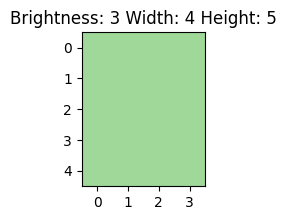

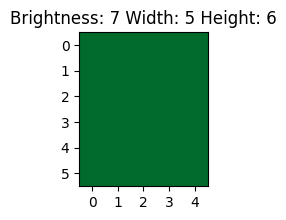

In [19]:
#First iteration of the model : written down generative model

#Generative process
#8x8x8 
#3 state factors: color, width, height 

brightness = [1,2,3,4,5,6,7,8]
widths = [1,2,3,4,5,6,7,8]
heights = [1,2,3,4,5,6,7,8]

def is_food(brightness, width, height):
    if brightness >= 4 and width >= 4 and height >= 4:
        return True
    return False

def is_poison(brightness, width, height):
    if not is_food(brightness, width, height):
        return True 
    return False

def plot_item(brightness, width, height):
    item = np.zeros((width, height))
    item[:,:] = brightness
    fig = plt.figure(figsize = (2,2))
    plt.imshow(item.T, vmin = 0, vmax = 8, cmap = "Greens")
    plt.title("Brightness: " + str(brightness) + " Width: " + str(width) + " Height: " + str(height))
    plt.xticks(range(width))
    plt.yticks(range(height))
    plt.show()

plot_item(3,4,5)

plot_item(7,5,6)

In [20]:
np.random.choice(list(range(8)))

5

In [21]:

def generate_random_observation(reward = 'NULL'):
    if reward == 'NULL':
        reward = 0
    brightness = np.random.choice(list(range(8)))
    width = np.random.choice(list(range(8)))
    height = np.random.choice(list(range(8)))
    return [brightness, width, height, reward]

def generate_reward_given_action(action, is_food):
    action = int(action)
    if action == 0:
        return 0
    elif action == 1 and is_food:
        return 1
    
    elif action == 1 and not is_food:
        return 2


def run_loop(agent, observation):

    qs = agent.infer_states(tuple(observation))
    # print(f"Posterior over luminance: {qs[0]}")
    # print(f"Posterior over wideness: {qs[1]}")
    # print(f"Posterior over highness: {qs[2]}")
    # print(f"Posterior over inside-outside: {qs[3]}")

    q_pi, G = agent.infer_policies()

    print(f"Posterior over actions: {q_pi}")

    action = agent.sample_action()

    print(f"Action: {['not eat', 'eat'][int(action[-1])]}")
    
    return action, agent

def run_trial(observation, agent):

    reward_observations = []
    eating = False
    t = 0
    # agent.qs = agent.D
    # agent.reset()
    # agent.action = None

    while not eating and t < 300:
        t += 1
        agent.action = None
        agent.qs = copy.copy(agent.D)
        #generate a random observation with null reward -> new food item
        observation = generate_random_observation(reward = 'NULL')
        #is the item food - from generative process?
        obs_is_food = is_food(observation[0], observation[1], observation[2])

        print(f"Is it food? {obs_is_food}")

        #agent decides whether to eat 
        action, agent = run_loop(agent, observation)

        #generate reward given whether the agent ate it, and whether it was food
        next_reward_obs = generate_reward_given_action(action[-1],obs_is_food)


        if next_reward_obs != 0:

            reward_observations.append(next_reward_obs)

            #next observation is informative of this reward
            next_observation = observation[:3] + [next_reward_obs]

            print(f"Updating A matrix with observation: {next_observation} and qs: {agent.qs}")

            #update the A matrix given the new state of the world (with insideness) and the observation given the action
            agent.infer_states(tuple(next_observation))
            agent.update_A(next_observation)

        if int(action[-1]) == 1:
            eating = True
            print(f"Eating, ending trial")
            print(f'reward observation: {["null", "positive", "negative"][int(next_observation[3])]}')
            print(agent.A[3][1:,:,:,:,1])
            
            break
    return reward_observations




In [22]:

num_trials = 300

rewards_per_trial = []

for trial in range(num_trials):
    print()

    print(f"Trial: {trial}")
    observation = generate_random_observation()
    reward_observations = run_trial(observation, agent)
    rewards_per_trial.append(reward_observations[-1])




Trial: 0
Is it food? False
Posterior over actions: [1.12534959e-07 9.99999887e-01]
Action: eat
Updating A matrix with observation: [3, 1, 0, 2] and qs: [array([1.e+00, 4.e-16]) array([0.8, 0.2]) array([0.8, 0.2])
 array([1.e+00, 1.e-16])]
Eating, ending trial
reward observation: negative
[[[[0.09209688 0.39159892]
   [0.39159892 0.4914966 ]]

  [[0.5        0.5       ]
   [0.5        0.5       ]]]


 [[[0.90790312 0.60840108]
   [0.60840108 0.5085034 ]]

  [[0.5        0.5       ]
   [0.5        0.5       ]]]]

Trial: 1
Is it food? False
Posterior over actions: [1.12534959e-07 9.99999887e-01]
Action: eat
Updating A matrix with observation: [6, 0, 1, 2] and qs: [array([4.e-16, 1.e+00]) array([0.8, 0.2]) array([0.8, 0.2])
 array([1.e+00, 1.e-16])]
Eating, ending trial
reward observation: negative
[[[[0.09209688 0.39159892]
   [0.39159892 0.4914966 ]]

  [[0.09209688 0.39159892]
   [0.39159892 0.4914966 ]]]


 [[[0.90790312 0.60840108]
   [0.60840108 0.5085034 ]]

  [[0.90790312 0.608401

([<matplotlib.axis.YTick at 0x14a242a00>,
 [Text(0, 1, 'positive'), Text(0, 2, 'negative')])

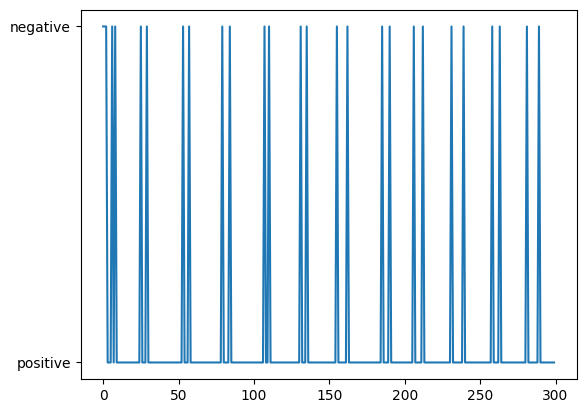

In [23]:
plt.plot(range(num_trials), rewards_per_trial)
plt.yticks([1,2],labels = ["positive", "negative"])


In [24]:
reduced_A[3][:,:,0,0,1]

array([[0. , 0. ],
       [0.5, 0.5],
       [0.5, 0.5]])

In [38]:
agent.pA[3][1:,:,1,1,1]

array([[5.00000000e-01, 1.31770854e+03],
       [4.83672916e+00, 5.92856191e-01]])

In [35]:
agent.pA[3][1:,0,:,0,1]

array([[0.5       , 0.5       ],
       [4.9539491 , 1.10466087]])

In [36]:
agent.pA[3][1:,0,0,:,1]

array([[0.5       , 0.5       ],
       [4.9539491 , 1.10466087]])